# Linear Regression - Assignment :Rohit Keshari

* To build a multiple linear regression model for the prediction of car prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

# train and test splt
import sklearn
from sklearn.model_selection import train_test_split

# scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# statsmodels for getting the constant var 
import statsmodels.api as sm  

# for VIF calculations
from statsmodels.stats.outliers_influence import variance_inflation_factor

# r2_score

from sklearn.metrics import r2_score 

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [2]:
# importing the data
CarPrice = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
# data view of CarPrice
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Lets check the shape of CarPrice
CarPrice.shape

(205, 26)

In [5]:
# lets see the datatype and some more information of CarPrice

# As can see the no null value
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
# Visulize the data and stats. componenet for this CarPrice data
CarPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# checked the null value and no null value present in this dataset
CarPrice.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Step 2 : Data Preparation

##### There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. Now, need to consider only company name as the independent variable for model building.

In [8]:
# new columns created after splitting the columns CarName
new = CarPrice["CarName"].str.split(" ", n = 1, expand = True) 
CarPrice["Company"]= new[0]
CarPrice["Model"]= new[1]

In [9]:
# let check the CarPrice data and columns is create properly or not
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [10]:
# lets drop the CarName cloumn from CarPrice data

CarPrice.drop(['CarName'],axis=1,inplace=True)

# see the data after dropping the Column
CarPrice.head()


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [11]:
# lets chekc the uniqueness of the "Company" columns

CarPrice["Company"].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### As can see that below  model name are the same only the spelling mistake are there also in model - Nissan lower char.

#### So, I will replace the model name which is correct and change all the columns to lower case.


1. 'maxda', 'mazda'
* 'Nissan', 'nissan'  
* 'porsche', 'porcshce',
* 'toyota', 'toyouta',
* 'vokswagen', 'volkswagen', 'vw'


In [12]:
# changes the lower case of each value in Company column
CarPrice["Company"]=CarPrice["Company"].str.lower()

In [13]:
# now agin check the Company columns 
CarPrice["Company"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
# replaced with correct Company name

CarPrice["Company"].replace('maxda','mazda',inplace=True)
CarPrice["Company"].replace('porsche','porcshce',inplace=True)
CarPrice["Company"].replace('toyouta','toyota',inplace=True)
CarPrice["Company"].replace('vokswagen','volkswagen',inplace=True)
CarPrice["Company"].replace('vw','volkswagen',inplace=True)

In [15]:
# lets verify the Company unique value again
CarPrice["Company"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porcshce', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Step 3: Visualising the Data

#### Visualising Numeric Variables
##### Let's make a pairplot of all the numeric variables

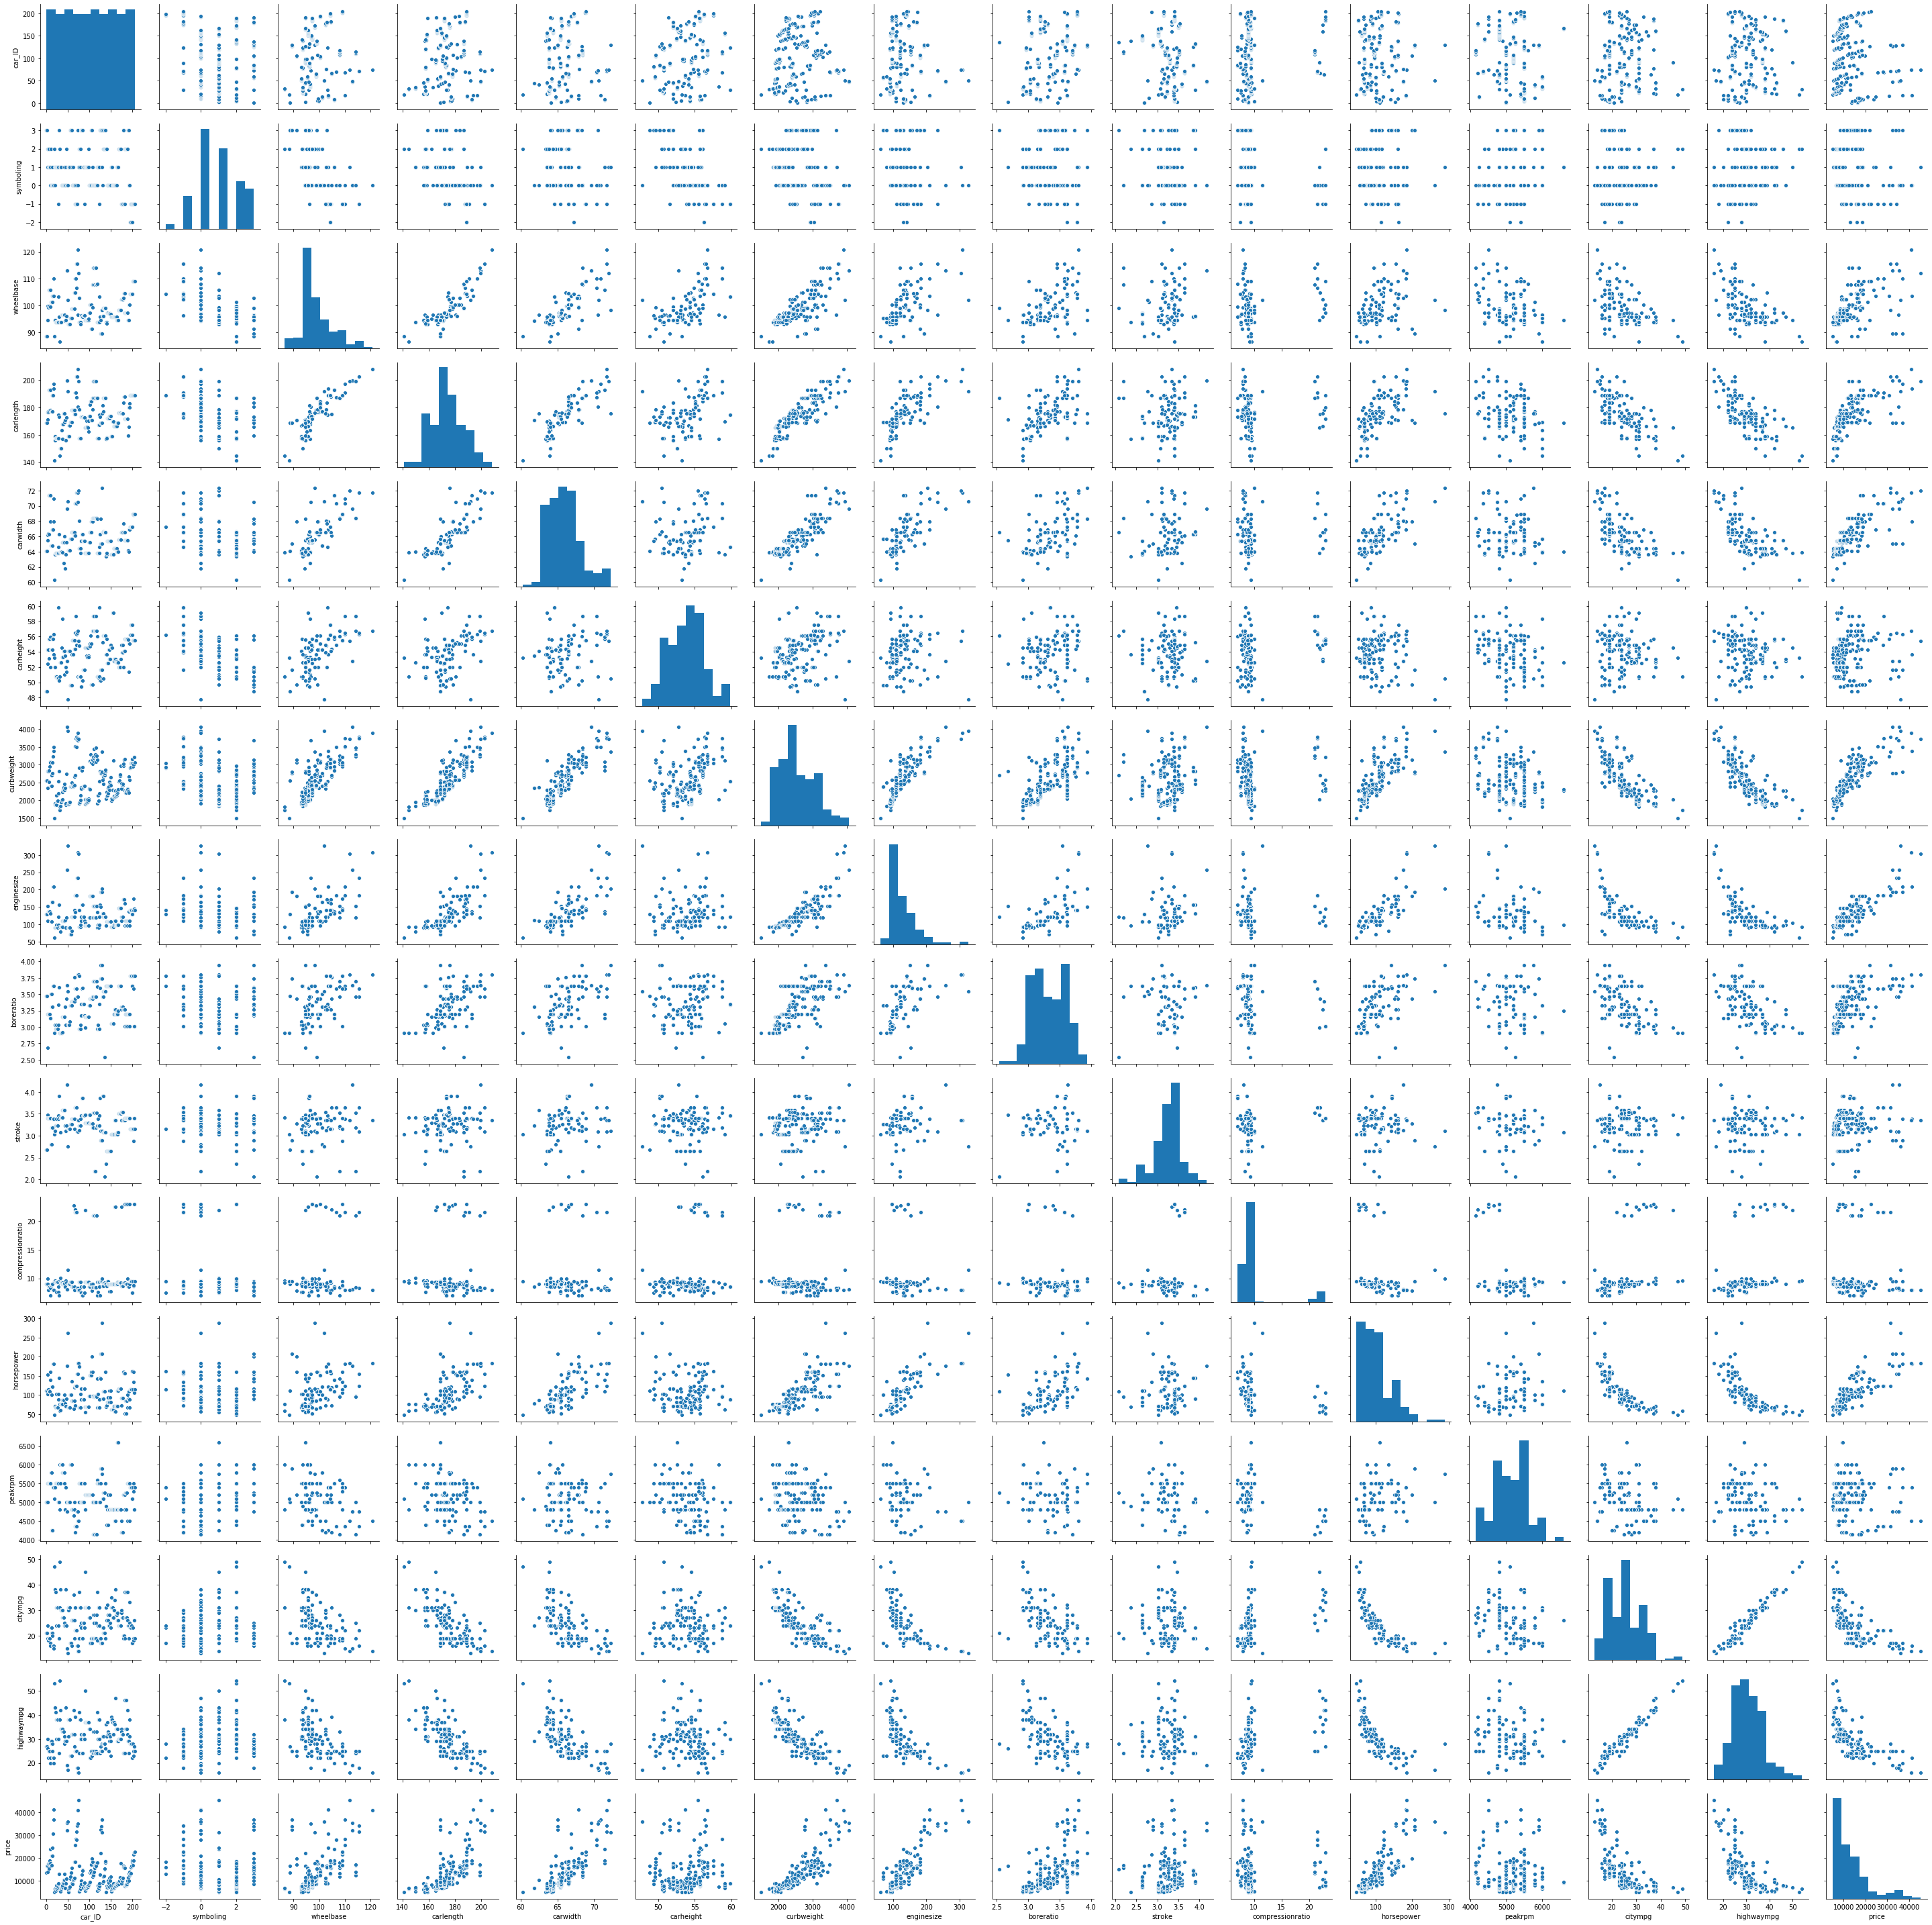

In [16]:
# pairplot for the CarPrice
sns.pairplot(CarPrice)

##### As per the above pair plot can not see the proper name of the columns so lets do with separetely

In [17]:
# Check the columns for the CarPrice
CarPrice.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Company',
       'Model'],
      dtype='object')

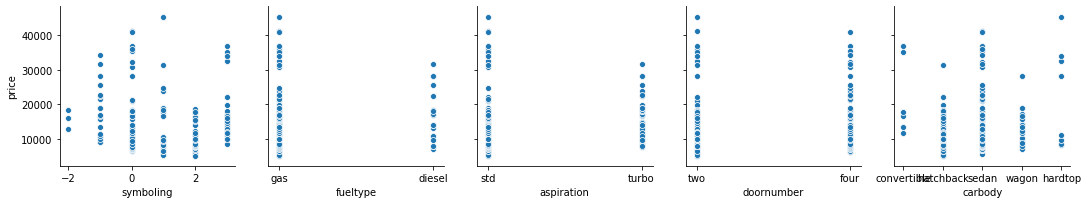

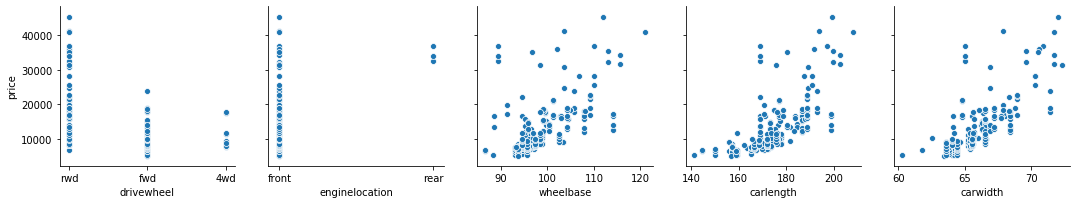

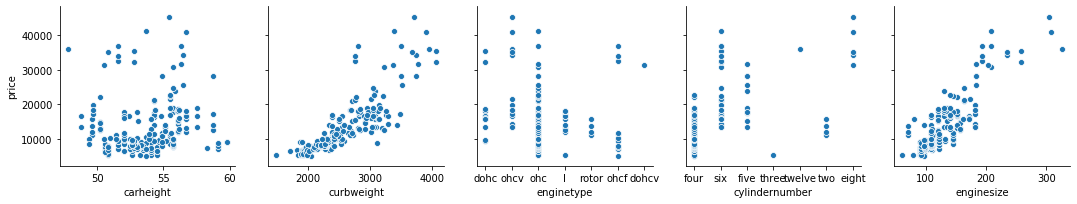

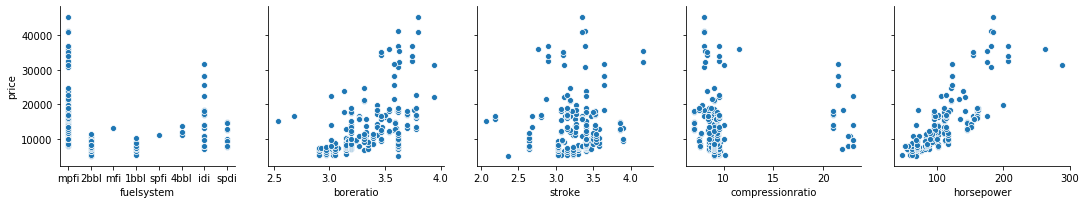

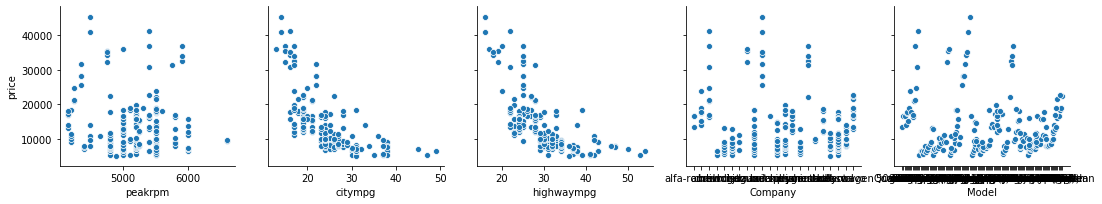

In [18]:
# Visualize the CarPrice data and see the insights from this pairplot

def pairplot_fun(a,b,c,d,e):
    sns.pairplot(CarPrice, x_vars=[a,b,c,d,e], y_vars='price',size=3, aspect=1, kind='scatter')

pairplot_fun('symboling','fueltype','aspiration','doornumber','carbody')
pairplot_fun('drivewheel','enginelocation','wheelbase','carlength','carwidth')
pairplot_fun('carheight','curbweight','enginetype','cylindernumber','enginesize')
pairplot_fun('fuelsystem','boreratio','stroke','compressionratio','horsepower')
pairplot_fun('peakrpm','citympg','highwaympg','Company','Model')
  

##### Below all are showing the +ive corr. with price

1. wheelbase
* wheelbase
* carlength
* carwidth
* curbweight
* enginesize
* boreratio
* horsepower

#####  Below two row showing the -ive corr. with price

1. citympg
* highwaympg



In [19]:
# Corr. of CarPrice data and can not visualize this correctly so plat the heat map in next call for this data
CarPrice.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


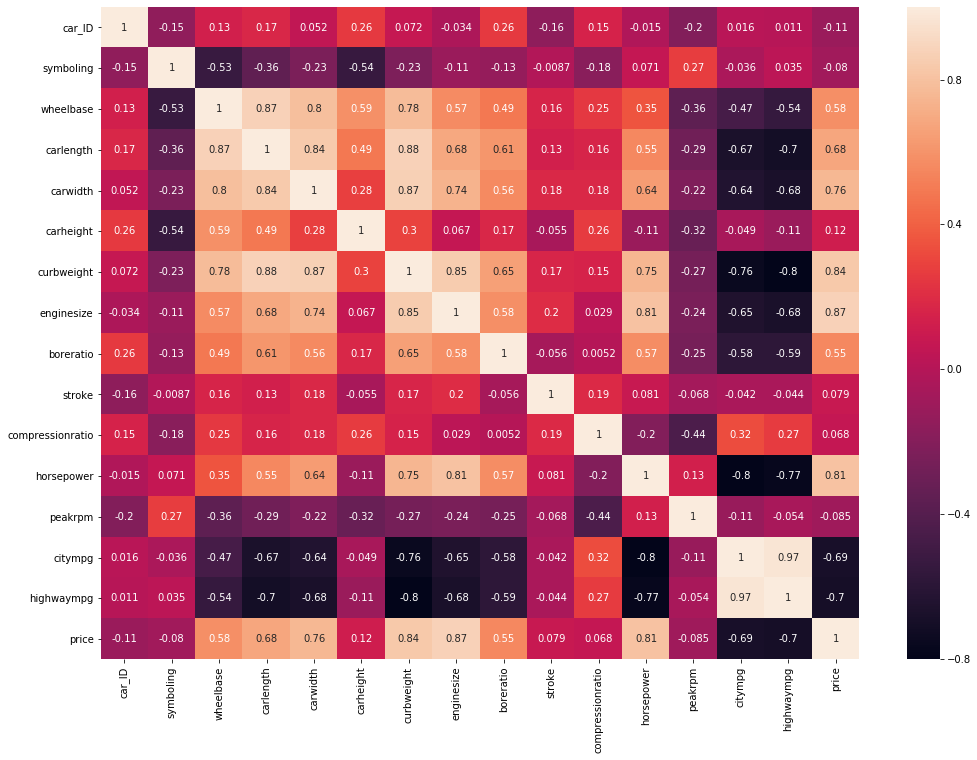

In [20]:
# visualize the heatmap data for numeric
plt.figure(figsize=(17,12))
sns.heatmap(CarPrice.corr(),annot = True)


#### Heatmap giving the correct corr. value for the CarPrice Numerical columns

#### Visualising Categorical Variables

* As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [21]:
# CarPrice columns view
CarPrice.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Company',
       'Model'],
      dtype='object')

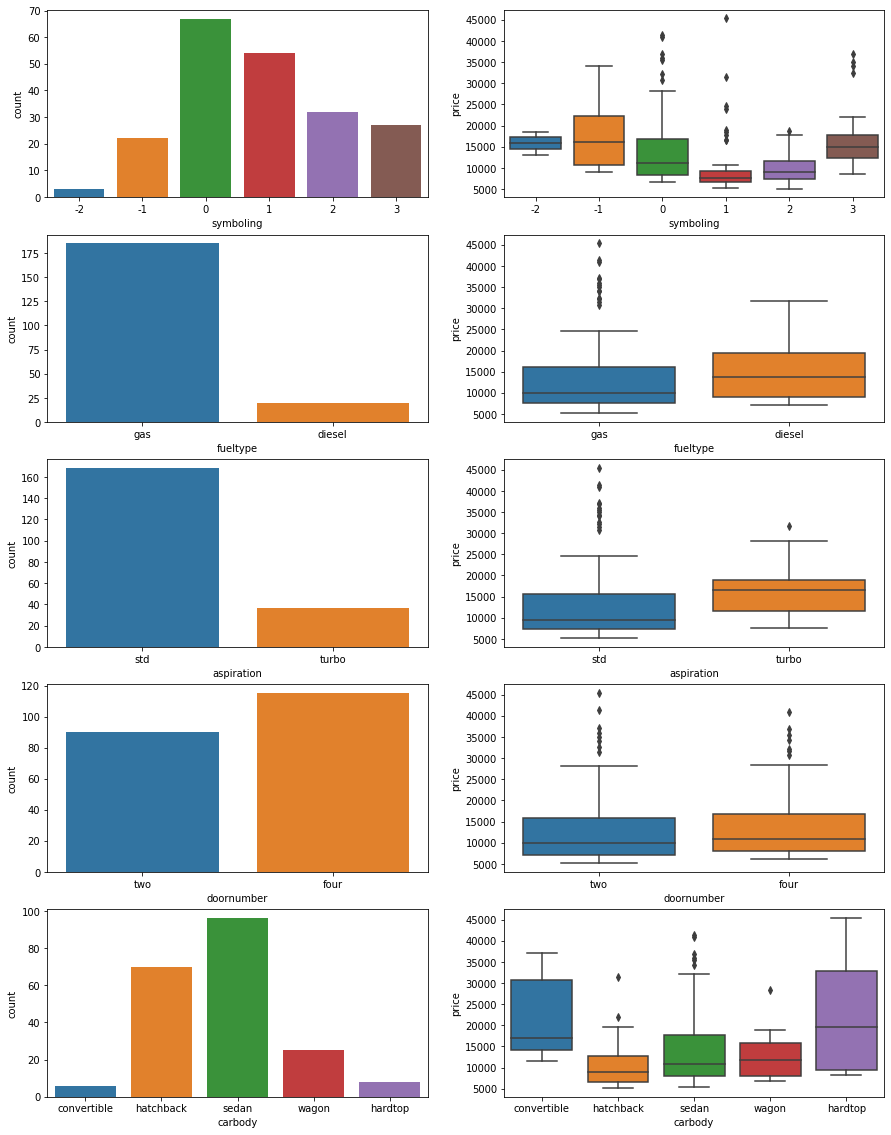

In [22]:
# lets make the functon and visualize the bolx plot and Histogram together for to understand the data.

# defined the function and calling them with column which I need to visualize.

def boxplot_count(col,fig):
    plt.subplot(5,2,fig)
    sns.countplot(CarPrice[col]) # Countplot
    
    plt.subplot(5,2,(fig+1))
    sns.boxplot(x=CarPrice[col], y=CarPrice.price) # boxplot

plt.figure(figsize=(15,20))

boxplot_count('symboling', 1)
boxplot_count('fueltype', 3)
boxplot_count('aspiration', 5)
boxplot_count('doornumber', 7)
boxplot_count('carbody', 9)


### Data Insights:

* Can see the symboling with "1" and "0" high value in Histogram.
* symboling with "-1" has maximum median in box plot.
* fueltype - Maximum cars number are "gas" as "diesel" has higher meadian than "gas"
* aspiration - showing "turbo" has median greater than "std"
* doornumber - both median are looking as similar 
* Carbody - seem "seadan" has sold the most.

### Conclusion:
    
* symboling with "1" and "0" sold most and symboling with "-1" has maximum price of car.
* "Gas" fueltype car sold the most as its price is lower than "diesel".
* "turbo" has greater  price than "std" in aspiration.
* doornumber is causing any price differance.
* "sedan" car has sold the most in Carbody.



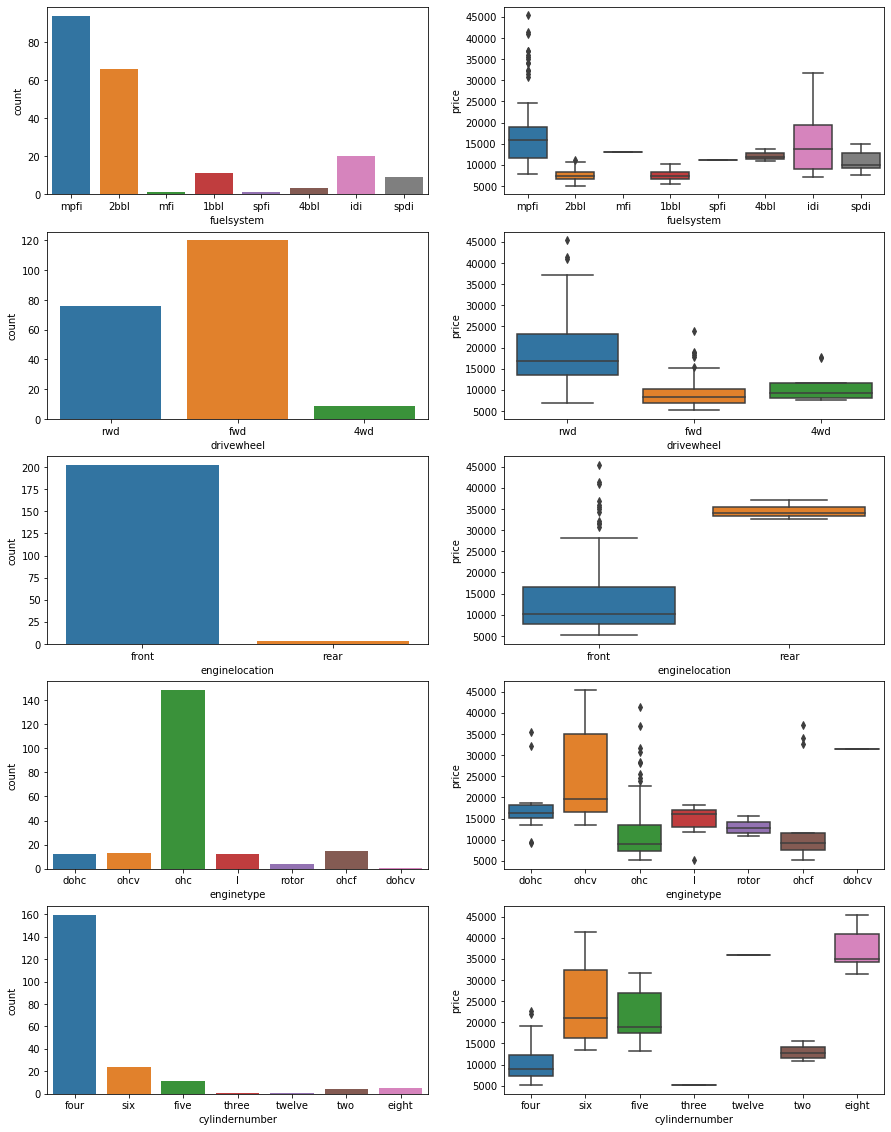

In [23]:
# calling boxplot_count function with column which I need to visualize.
plt.figure(figsize=(15,20))
boxplot_count('fuelsystem', 1)
boxplot_count('drivewheel', 3)
boxplot_count('enginelocation', 5)
boxplot_count('enginetype', 7)
boxplot_count('cylindernumber', 9)

### Data Insights:

* "mpfi" and "2bbl" having highest number as also "mpfi" and "idi" maximum median compare to other. 
* "fwd" has maximum number in Histogram and low median in boxplot.
* "front" enginelocation has maximum number in Histogram and low median in boxplot.
* "ohc" has maximum number in Histogram and low median in boxplot.
* "four" cylindernumber has  maximum number in Histogram and low median in boxplot.

### Conclusion:

* "mpfi" and "2bbl" are most sold type of fuel systems. "mpfi" and "idi" having the highest price range. 
* "fwd" has maximum selling car because its price is low as compare to others.
* "front" enginelocation prefer most as with "rear" enginelocation also its have low price compare to "rear" enginelocation.
* "ohc" has maximum selling car because its price is low as compare to others.
* "four" cylindernumber is preferred most as compare to other also its cost is low with all cylindernumber.


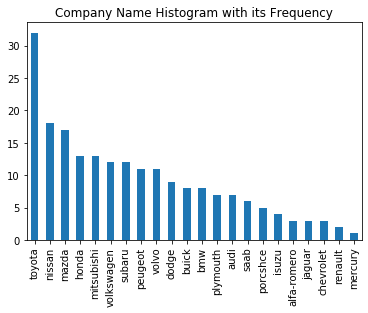

In [24]:
# Histogram of Company column and seeing who is leading ?

plt.title('Company Name Histogram with its Frequency')
CarPrice['Company'].value_counts().plot(kind='bar')


* "toyota" seemed to be most sold Company in CaPrice data.

Text(0.5, 1.0, 'Car Body vs Average Price of CarPrice Data')

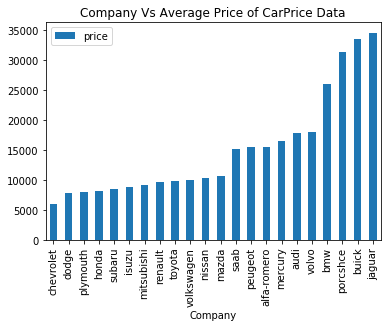

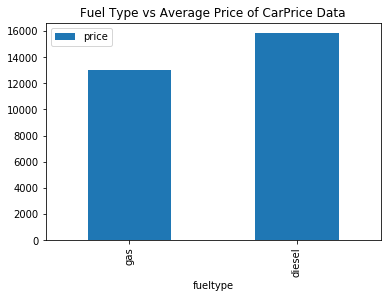

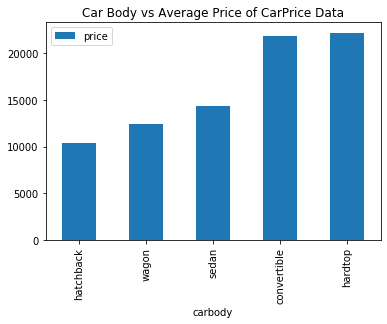

In [25]:
# lets see how data is telling when will go with average

# Comany Avg price
Com_Avg_Price = pd.DataFrame(CarPrice.groupby(['Company'])['price'].mean().sort_values())
Com_Avg_Price.plot.bar()
plt.title('Company Vs Average Price of CarPrice Data')

# fuel avg price
fuel_Avg_Price = pd.DataFrame(CarPrice.groupby(['fueltype'])['price'].mean().sort_values())
fuel_Avg_Price.plot.bar()
plt.title('Fuel Type vs Average Price of CarPrice Data')

# Carbody avg price
carbody_Avg_Price = pd.DataFrame(CarPrice.groupby(['carbody'])['price'].mean().sort_values())
carbody_Avg_Price.plot.bar()
plt.title('Car Body vs Average Price of CarPrice Data')


### Conclusion of above plots:

* "Jaguar" and "Buick" have highest average price.
* "Diesel" has high average price.
* "hardtop" and "convertible" have high average price.


In [26]:
# CarPrice column list
CarPrice.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Company',
       'Model'],
      dtype='object')

##### Deriving new column to get Fuel economy of CAR

In [27]:
#Fuel economy 
CarPrice['Mileage'] = (0.60 * CarPrice['citympg']) + (0.40 * CarPrice['highwaympg'])

In [28]:
# data head of the derived column
CarPrice['Mileage'].head()

0    23.4
1    23.4
2    21.8
3    26.4
4    19.6
Name: Mileage, dtype: float64

Text(0, 0.5, 'Price')

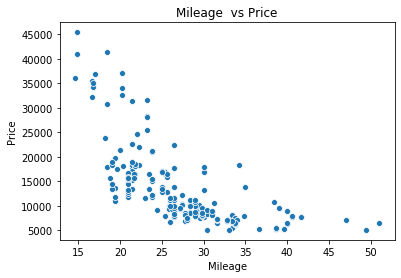

In [29]:
# lets see the data with Mileage and Price

plt.title('Mileage  vs Price')
sns.scatterplot(x=CarPrice['Mileage'],y=CarPrice['price'])
plt.xlabel('Mileage')
plt.ylabel('Price')

* Mileage has an negative correlation with price.

### Step 4: Significant variables after Visual analysis of CarPrice data

#### List of  variables after Visual analysis of CarPrice data :
- enginetype
- fueltype
- carbody 
- aspiration 
- cylindernumber 
- drivewheel 
- curbweight 
- carlength
- carwidth
- enginesize 
- Boreratio 
- horsepower 
- wheelbase 
- Mileage

In [30]:
# columns view
CarPrice.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Company',
       'Model', 'Mileage'],
      dtype='object')

In [31]:
# creating the data CarPrice_depend where taking all those columns which I can see playing significant role in CarPrice data

CarPrice_depend = CarPrice[['price','fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength', 
                            'carwidth','enginetype', 'cylindernumber','enginesize', 'boreratio','horsepower','Company','Mileage']]


In [32]:
# CarPrice_depend data view
CarPrice_depend.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,enginetype,cylindernumber,enginesize,boreratio,horsepower,Company,Mileage
0,13495.0,gas,std,convertible,rwd,88.6,168.8,64.1,dohc,four,130,3.47,111,alfa-romero,23.4
1,16500.0,gas,std,convertible,rwd,88.6,168.8,64.1,dohc,four,130,3.47,111,alfa-romero,23.4
2,16500.0,gas,std,hatchback,rwd,94.5,171.2,65.5,ohcv,six,152,2.68,154,alfa-romero,21.8
3,13950.0,gas,std,sedan,fwd,99.8,176.6,66.2,ohc,four,109,3.19,102,audi,26.4
4,17450.0,gas,std,sedan,4wd,99.4,176.6,66.4,ohc,five,136,3.19,115,audi,19.6


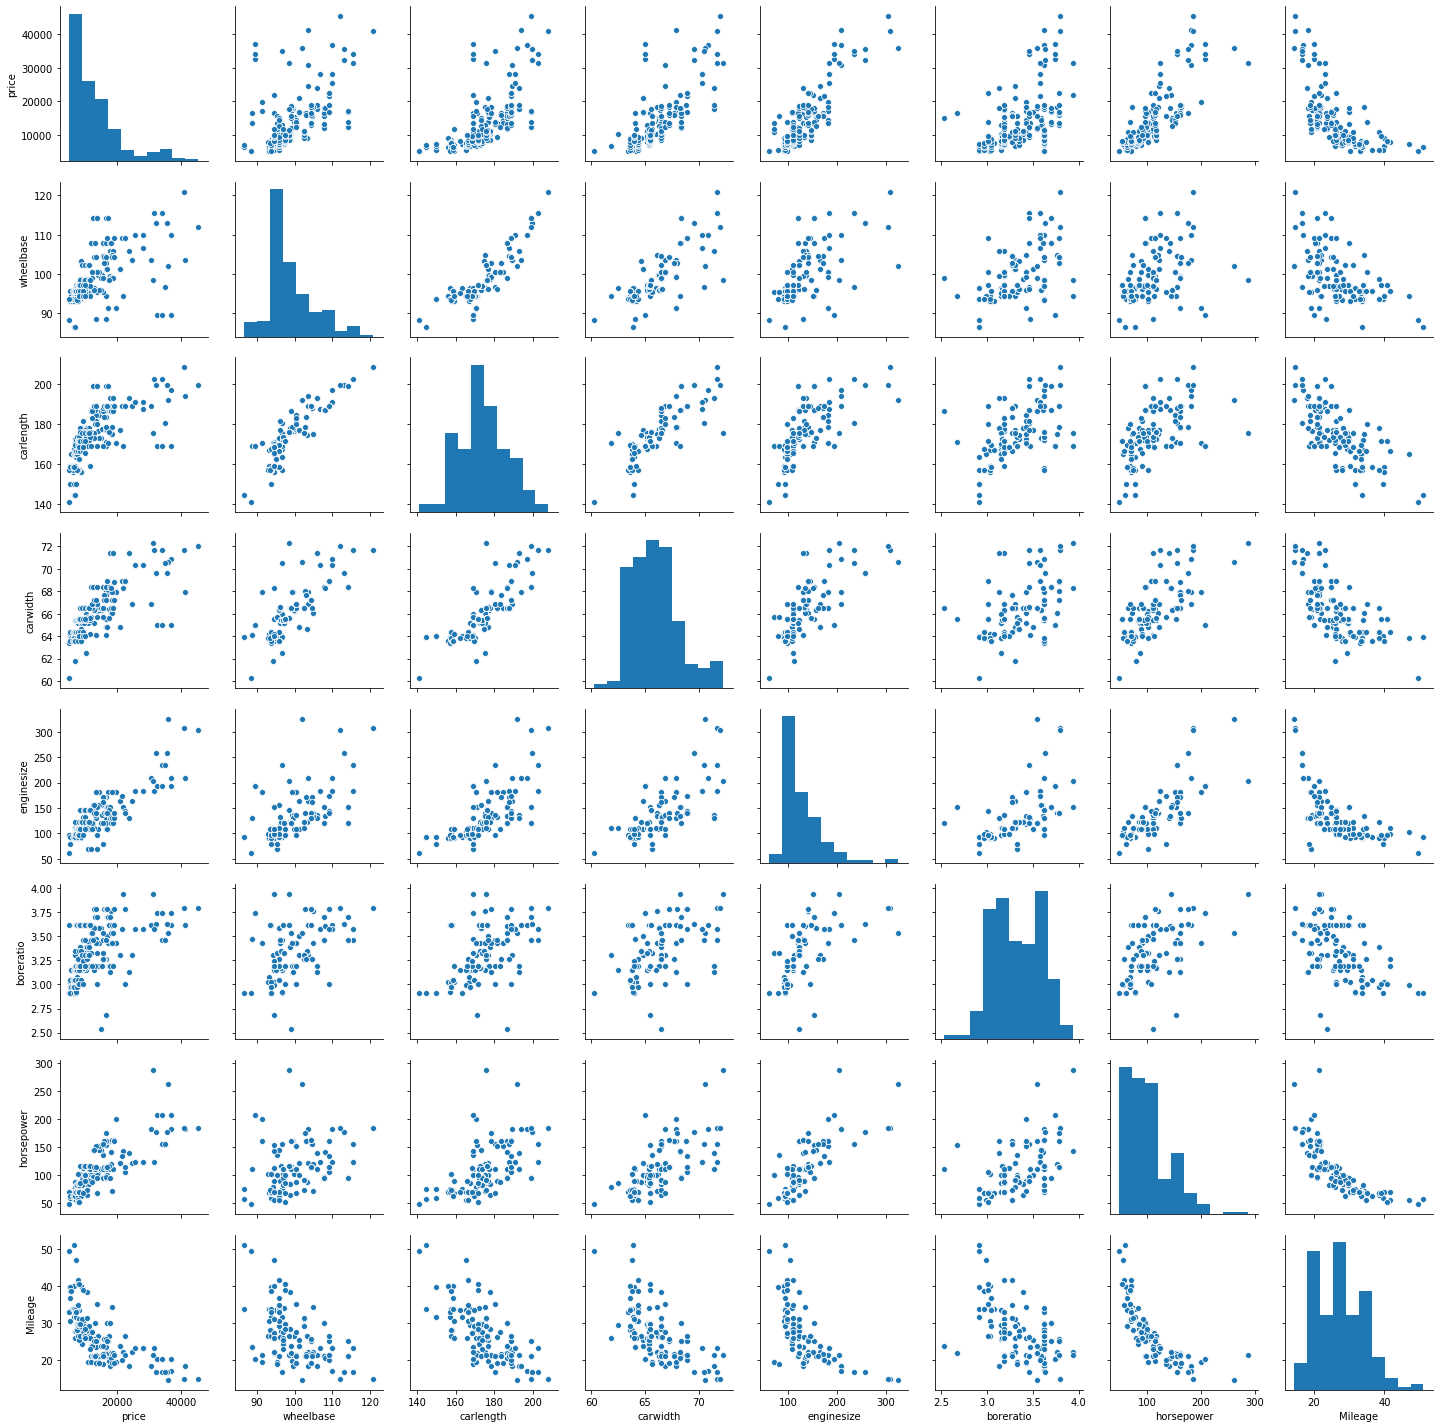

In [33]:
# lets check the data is really lineat with Price and other variable or not ?
sns.pairplot(CarPrice_depend)

### Step 5: Dummy Variables

In [34]:
# CarPrice_depend data datatype and other information
CarPrice_depend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
price             205 non-null float64
fueltype          205 non-null object
aspiration        205 non-null object
carbody           205 non-null object
drivewheel        205 non-null object
wheelbase         205 non-null float64
carlength         205 non-null float64
carwidth          205 non-null float64
enginetype        205 non-null object
cylindernumber    205 non-null object
enginesize        205 non-null int64
boreratio         205 non-null float64
horsepower        205 non-null int64
Company           205 non-null object
Mileage           205 non-null float64
dtypes: float64(6), int64(2), object(7)
memory usage: 24.1+ KB


In [35]:
# defining the fuction to make the dummy variables where required
def dum_var(col,car_data):
    temp = pd.get_dummies(car_data[col], drop_first = True) # dummyvariable creation
    car_data= pd.concat([car_data, temp], axis = 1) # concat. the dummy variable to CarPrice_depend
    car_data.drop([col], axis = 1, inplace = True) # dropping the variable from which dummy variable created
    return car_data # return the data 

#calling the funtion and coverting the dummy
CarPrice_depend = dum_var('fueltype',CarPrice_depend)
CarPrice_depend = dum_var('aspiration',CarPrice_depend)
CarPrice_depend = dum_var('carbody',CarPrice_depend)
CarPrice_depend = dum_var('drivewheel',CarPrice_depend)
CarPrice_depend = dum_var('enginetype',CarPrice_depend)
CarPrice_depend = dum_var('cylindernumber',CarPrice_depend)
CarPrice_depend = dum_var('Company',CarPrice_depend)


In [36]:
# check the CarPrice_depend data after dummy variable creation
CarPrice_depend.head()

,price,wheelbase,carlength,carwidth,enginesize,boreratio,horsepower,Mileage,gas,turbo,...,nissan,peugeot,plymouth,porcshce,renault,saab,subaru,toyota,volkswagen,volvo
0,13495.0,88.6,168.8,64.1,130,3.47,111,23.4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,16500.0,88.6,168.8,64.1,130,3.47,111,23.4,1,0,...,0,0,0,0,0,0,0,0,0,0
2,16500.0,94.5,171.2,65.5,152,2.68,154,21.8,1,0,...,0,0,0,0,0,0,0,0,0,0
3,13950.0,99.8,176.6,66.2,109,3.19,102,26.4,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17450.0,99.4,176.6,66.4,136,3.19,115,19.6,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#check the shape of this data
CarPrice_depend.shape

(205, 49)

### Step 6:Train-Test Split and feature scaling

##### Need to import "import sklearn" and "from sklearn.model_selection import train_test_split. and which I did in first cell


In [38]:
# lets divide the train and test data with 70 and 30 percent ratio.
df_train, df_test = train_test_split(CarPrice_depend, train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(143, 49)
(62, 49)


In [39]:
# let see the data train
df_train.head()

,price,wheelbase,carlength,carwidth,enginesize,boreratio,horsepower,Mileage,gas,turbo,...,nissan,peugeot,plymouth,porcshce,renault,saab,subaru,toyota,volkswagen,volvo
122,7609.0,93.7,167.3,63.8,98,2.97,68,33.8,1,0,...,0,0,1,0,0,0,0,0,0,0
125,22018.0,94.5,168.9,68.3,151,3.94,143,22.2,1,0,...,0,0,0,1,0,0,0,0,0,0
166,9538.0,94.5,168.7,64.0,98,3.24,112,27.2,1,0,...,0,0,0,0,0,0,0,1,0,0
1,16500.0,88.6,168.8,64.1,130,3.47,111,23.4,1,0,...,0,0,0,0,0,0,0,0,0,0
199,18950.0,104.3,188.8,67.2,130,3.62,162,19.0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [40]:
# let see the data test
df_test.head()

,price,wheelbase,carlength,carwidth,enginesize,boreratio,horsepower,Mileage,gas,turbo,...,nissan,peugeot,plymouth,porcshce,renault,saab,subaru,toyota,volkswagen,volvo
160,7738.0,95.7,166.3,64.4,98,3.19,70,41.6,1,0,...,0,0,0,0,0,0,0,1,0,0
186,8495.0,97.3,171.7,65.5,109,3.19,85,29.8,1,0,...,0,0,0,0,0,0,0,0,1,0
59,8845.0,98.8,177.8,66.5,122,3.39,84,28.4,1,0,...,0,0,0,0,0,0,0,0,0,0
165,9298.0,94.5,168.7,64.0,98,3.24,112,27.2,1,0,...,0,0,0,0,0,0,0,1,0,0
140,7603.0,93.3,157.3,63.8,108,3.62,73,28.0,1,0,...,0,0,0,0,0,0,1,0,0,0


### Step 7: Rescaling the Features 

###### Scaling is a technique to standardize the independent features present in the data in a fixed range. If scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

#### Reason to perform the scaling:
* Helps to normalize the data within a particular range.
* it also helps in speeding up the calculations in an algorithm.

#### Types:

1. Min-Max scaling (normalization) : between 0 and 1
2. Standardisation (mean-0, sigma-1) 



* This time, we will use MinMax scaling.

In [41]:
# cheked the train data again
df_train.head()

,price,wheelbase,carlength,carwidth,enginesize,boreratio,horsepower,Mileage,gas,turbo,...,nissan,peugeot,plymouth,porcshce,renault,saab,subaru,toyota,volkswagen,volvo
122,7609.0,93.7,167.3,63.8,98,2.97,68,33.8,1,0,...,0,0,1,0,0,0,0,0,0,0
125,22018.0,94.5,168.9,68.3,151,3.94,143,22.2,1,0,...,0,0,0,1,0,0,0,0,0,0
166,9538.0,94.5,168.7,64.0,98,3.24,112,27.2,1,0,...,0,0,0,0,0,0,0,1,0,0
1,16500.0,88.6,168.8,64.1,130,3.47,111,23.4,1,0,...,0,0,0,0,0,0,0,0,0,0
199,18950.0,104.3,188.8,67.2,130,3.62,162,19.0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [42]:
# Applying the scaler() to all the columns except the 'yes-no (1 or 0)'

# let store the numerical column to "numerical_vars"

numerical_vars =  ['price','wheelbase','carlength','carwidth','boreratio','Mileage','enginesize','horsepower']

#v perforinmg the scaler.fit_transform() for train data

df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

# see the data after scaling
df_train.head()

,price,wheelbase,carlength,carwidth,enginesize,boreratio,horsepower,Mileage,gas,turbo,...,nissan,peugeot,plymouth,porcshce,renault,saab,subaru,toyota,volkswagen,volvo
122,0.068818,0.244828,0.426016,0.291667,0.139623,0.230159,0.083333,0.527473,1,0,...,0,0,1,0,0,0,0,0,0,0
125,0.466890,0.272414,0.452033,0.666667,0.339623,1.000000,0.395833,0.208791,1,0,...,0,0,0,1,0,0,0,0,0,0
166,0.122110,0.272414,0.448780,0.308333,0.139623,0.444444,0.266667,0.346154,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.314446,0.068966,0.450407,0.316667,0.260377,0.626984,0.262500,0.241758,1,0,...,0,0,0,0,0,0,0,0,0,0
199,0.382131,0.610345,0.775610,0.575000,0.260377,0.746032,0.475000,0.120879,1,1,...,0,0,0,0,0,0,0,0,0,1


#### Can see that data is propely scaled in between 0 and 1 now.

In [43]:
# corr. of train data
df_train.corr()

,price,wheelbase,carlength,carwidth,enginesize,boreratio,horsepower,Mileage,gas,turbo,...,nissan,peugeot,plymouth,porcshce,renault,saab,subaru,toyota,volkswagen,volvo
price,1.000000,0.622591,0.713749,0.799380,0.867915,0.533591,0.806183,-0.684484,-0.191150,2.065405e-01,...,-0.126440,0.077676,-0.129405,0.302801,-0.052989,0.042719,-1.643733e-01,-0.148968,-0.059238,0.161924
wheelbase,0.622591,1.000000,0.877909,0.796888,0.588600,0.482386,0.382758,-0.506611,-0.393481,2.774139e-01,...,-0.157336,0.481538,-0.137718,-0.108163,-0.048575,0.014215,-1.013949e-01,-0.004621,-0.026522,0.288038
carlength,0.713749,0.877909,1.000000,0.846307,0.702794,0.620436,0.564588,-0.691012,-0.275886,2.349248e-01,...,-0.077103,0.346285,-0.150217,-0.026237,0.054390,0.153722,-8.065827e-02,-0.040208,-0.005208,0.256437
carwidth,0.799380,0.796888,0.846307,1.000000,0.754925,0.580962,0.685051,-0.668483,-0.293054,3.070265e-01,...,-0.144592,0.281075,-0.156830,0.178696,0.038331,0.043796,-1.027447e-01,-0.136127,-0.014381,0.209624
enginesize,0.867915,0.588600,0.702794,0.754925,1.000000,0.545157,0.817916,-0.639303,-0.145095,1.150503e-01,...,-0.015222,0.076266,-0.128621,0.206896,0.020541,-0.014190,-1.269648e-01,-0.055878,-0.076763,0.103578
boreratio,0.533591,0.482386,0.620436,0.580962,0.545157,1.000000,0.518307,-0.541376,-0.153727,1.866387e-01,...,-0.096245,0.272686,-0.210292,0.318523,0.069874,0.130910,3.469521e-01,-0.117697,-0.124850,0.228723
horsepower,0.806183,0.382758,0.564588,0.685051,0.817916,0.518307,1.000000,-0.772585,0.100280,2.228997e-01,...,-0.040266,-0.007241,-0.111649,0.407216,-0.037768,0.089177,-1.101059e-01,-0.081012,-0.083407,0.113391
Mileage,-0.684484,-0.506611,-0.691012,-0.668483,-0.639303,-0.541376,-0.772585,1.000000,-0.175324,-2.269408e-01,...,0.136153,-0.100529,0.109823,-0.137158,-0.024456,-0.096634,2.245351e-02,0.088230,0.009169,-0.145391
gas,-0.191150,-0.393481,-0.275886,-0.293054,-0.145095,-0.153727,0.100280,-0.175324,1.000000,-4.185461e-01,...,0.022324,-0.346410,0.053644,0.046291,0.037662,0.046291,9.128709e-02,0.057382,-0.040996,-0.055149
turbo,0.206540,0.277414,0.234925,0.307027,0.115050,0.186639,0.222900,-0.226941,-0.418546,1.000000e+00,...,-0.094287,0.279715,0.029988,-0.069007,-0.056143,0.057505,-2.832792e-18,-0.190089,-0.022917,0.172642


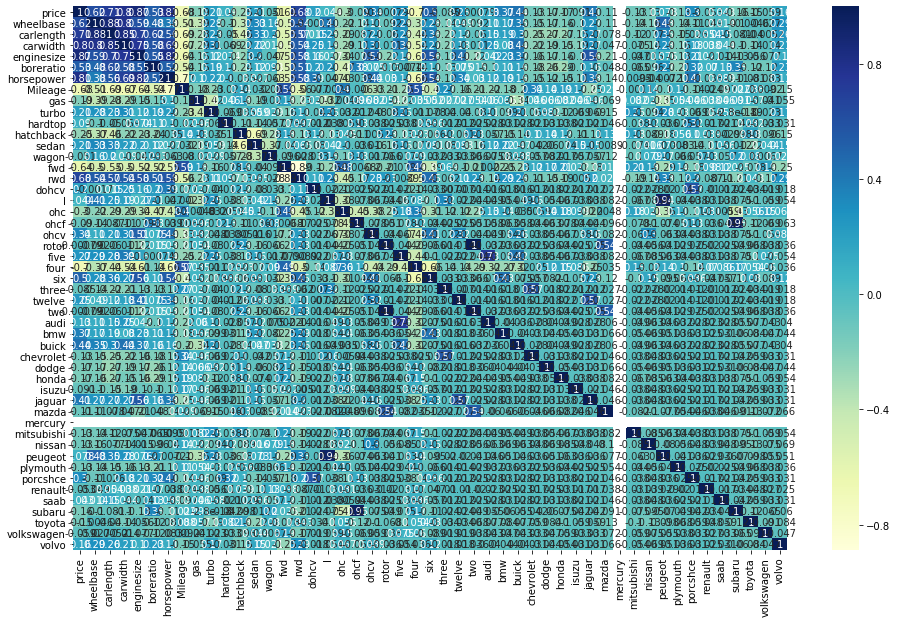

In [44]:
# heatmap

# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")


### Step 8: Model building Process

* Dividing into X and Y sets for the model building
* This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn) - Imported the required lib. in first cell.
* RFE : Recursive feature elimination

In [45]:
# Store the Dependent variable to "y_train" and Independent variable to "X_train"
y_train = df_train.pop('price')
X_train = df_train

In [46]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression() # LinearRegression function
lm.fit(X_train, y_train) # fir the data in LinearRegression function

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train) # fir the data in RFE now

In [47]:
# lets check the columns, value and and its ranking

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 2),
 ('carlength', False, 18),
 ('carwidth', True, 1),
 ('enginesize', False, 3),
 ('boreratio', False, 5),
 ('horsepower', True, 1),
 ('Mileage', False, 33),
 ('gas', False, 13),
 ('turbo', False, 22),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 20),
 ('rwd', False, 25),
 ('dohcv', True, 1),
 ('l', False, 11),
 ('ohc', False, 29),
 ('ohcf', True, 1),
 ('ohcv', False, 28),
 ('rotor', False, 4),
 ('five', False, 17),
 ('four', False, 10),
 ('six', False, 24),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', False, 8),
 ('audi', False, 9),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 31),
 ('dodge', False, 21),
 ('honda', False, 19),
 ('isuzu', False, 14),
 ('jaguar', True, 1),
 ('mazda', False, 32),
 ('mercury', False, 34),
 ('mitsubishi', False, 16),
 ('nissan', False, 26),
 ('peugeot', False, 12),
 ('plymouth', False, 23),
 ('porcshce', True, 1),
 ('renault', False, 15),
 ('saab', F

In [48]:
# Store the colmuns to "column"
column = X_train.columns[rfe.support_]

##### Building model using statsmodel, for the detailed statistics and imported the required lib. in first cell

In [49]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[column]

In [50]:
# define the funtion and we need to call the function as all the time when I need to re-build the model 

def Linear_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X # return the X 

# defined the vif check funtion  to check the VIF for the model
def vif_check(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

# Model - 1

In [51]:
# lets call the first model and see the stats and check the R-squared, p-value and VIF

X_train_new = Linear_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     119.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.12e-67
Time:                        13:25:28   Log-Likelihood:                 210.88
No. Observations:                 143   AIC:                            -389.8
Df Residuals:                     127   BIC:                            -342.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0146      0.033     -0.448      0.6

In [52]:
#Calculating the Variance Inflation Factor
vif_check(X_train_rfe)

,Features,VIF
7,ohcf,32.45
14,subaru,30.89
0,carwidth,22.17
1,horsepower,9.92
4,sedan,6.40
3,hatchback,3.58
13,porcshce,3.14
5,wagon,2.45
6,dohcv,2.18
12,jaguar,1.72


* Can see the :
    * R-Squared: 0.934
    * Adj. R-Squared: .926
* Good value has observed and now let check the "p-value" and "VIF"
* Model-1 summary and can see that "ohcf" has maximum VIF and removing the columns and re-run the model

# Model-2

In [53]:
# dropping the column "ohcf"
X_train_new = X_train_rfe.drop(["ohcf"], axis = 1)

# re-run the model with new variable

X_train_new = Linear_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           9.86e-66
Time:                        13:25:28   Log-Likelihood:                 204.56
No. Observations:                 143   AIC:                            -379.1
Df Residuals:                     128   BIC:                            -334.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0132      0.034     -0.388      0.6

In [54]:
#Calculating the Variance Inflation Factor
vif_check(X_train_new)

,Features,VIF
0,const,44.22
5,sedan,10.53
4,hatchback,9.38
6,wagon,5.45
2,horsepower,3.24
1,carwidth,3.03
3,hardtop,1.95
13,porcshce,1.93
7,dohcv,1.71
12,jaguar,1.70


* Can see the :
    * R-Squared: 0.927
    * Adj. R-Squared: .920
* Good value has observed and now let check the "p-value" and "VIF"
* Model-2 summary and can see that "hardtop" has maximum "p-value" and removing the columns and re-run the model

# Model-3

In [55]:
# dropping the column "hardtop"
X_train_new = X_train_new.drop(["hardtop"], axis = 1)
# re-run the model with new variable
X_train_new = Linear_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     125.7
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.51e-66
Time:                        13:25:29   Log-Likelihood:                 203.93
No. Observations:                 143   AIC:                            -379.9
Df Residuals:                     129   BIC:                            -338.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0345      0.028     -1.251      0.2

In [56]:
#Calculating the Variance Inflation Factor
vif_check(X_train_new)

,Features,VIF
0,const,28.97
4,sedan,6.94
3,hatchback,5.93
5,wagon,3.79
2,horsepower,3.24
1,carwidth,3.03
12,porcshce,1.75
11,jaguar,1.70
6,dohcv,1.65
8,twelve,1.57


* Can see the :
    * R-Squared: 0.927
    * Adj. R-Squared: .919
* Good value has observed and now let check the "p-value" and "VIF"
* Model-3 summary and can see that "sedan" has maximum "VIF" and removing the columns and re-run the model

# Model-4

In [57]:
# dropping the column "sedan"
X_train_new = X_train_new.drop(["sedan"], axis = 1)
# re-run the model with new variable
X_train_new = Linear_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     126.5
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.64e-65
Time:                        13:25:29   Log-Likelihood:                 198.54
No. Observations:                 143   AIC:                            -371.1
Df Residuals:                     130   BIC:                            -332.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0993      0.019     -5.179      0.0

In [58]:
#Calculating the Variance Inflation Factor
vif_check(X_train_new)

,Features,VIF
0,const,13.10
2,horsepower,3.01
1,carwidth,2.72
10,jaguar,1.69
11,porcshce,1.68
5,dohcv,1.62
7,twelve,1.57
9,buick,1.35
3,hatchback,1.27
4,wagon,1.15


* Can see the :
    * R-Squared: 0.921
    * Adj. R-Squared: .914
* Good value has observed and now let check the "p-value" and "VIF"
* Model-4 summary and can see that "wagon" has maximum "p-value" and removing the columns and re-run the model

# Model-5

In [59]:
# dropping the column "wagon"
X_train_new = X_train_new.drop(["wagon"], axis = 1)
# re-run the model with new variable
X_train_new = Linear_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     138.5
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.70e-66
Time:                        13:25:29   Log-Likelihood:                 198.29
No. Observations:                 143   AIC:                            -372.6
Df Residuals:                     131   BIC:                            -337.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1015      0.019     -5.388      0.0

In [60]:
#Calculating the Variance Inflation Factor
vif_check(X_train_new)

,Features,VIF
0,const,12.71
2,horsepower,3.01
1,carwidth,2.72
9,jaguar,1.68
10,porcshce,1.68
4,dohcv,1.62
6,twelve,1.57
8,buick,1.35
3,hatchback,1.17
7,bmw,1.14


* Can see the :
    * R-Squared: 0.921
    * Adj. R-Squared: .914
* Good value has observed and now let check the "p-value" and "VIF"
* Model-5 summary and can see that "twelve" has maximum "p-value" comaparing to other variable and removing the columns and re-run the model

# Model-6

In [61]:
# dropping the column "twelve"
X_train_new = X_train_new.drop(["twelve"], axis = 1)

# re-run the model with new variable
X_train_new = Linear_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     148.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.11e-66
Time:                        13:25:30   Log-Likelihood:                 195.98
No. Observations:                 143   AIC:                            -370.0
Df Residuals:                     132   BIC:                            -337.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1012      0.019     -5.304      0.0

In [62]:
#Calculating the Variance Inflation Factor
vif_check(X_train_new)

,Features,VIF
0,const,12.71
2,horsepower,2.86
1,carwidth,2.69
9,porcshce,1.67
4,dohcv,1.62
7,buick,1.35
8,jaguar,1.31
3,hatchback,1.17
6,bmw,1.13
5,three,1.07


* Can see the :
    * R-Squared: 0.918
    * Adj. R-Squared: .912
* Good value has observed and now let check the "p-value" and "VIF"
* Model-5 summary and can see that "three" has high "p-value" comaparing to other variable and removing the columns and re-run the model

# Model-6

In [63]:
# dropping the column "three"

X_train_new = X_train_new.drop(["three"], axis = 1)

# re-run the model with new variable
X_train_new = Linear_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     160.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           7.46e-67
Time:                        13:25:30   Log-Likelihood:                 193.61
No. Observations:                 143   AIC:                            -367.2
Df Residuals:                     133   BIC:                            -337.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0927      0.019     -4.908      0.0

In [64]:
#Calculating the Variance Inflation Factor
vif_check(X_train_new)

,Features,VIF
0,const,12.14
2,horsepower,2.86
1,carwidth,2.60
8,porcshce,1.67
4,dohcv,1.61
6,buick,1.34
7,jaguar,1.30
3,hatchback,1.16
5,bmw,1.13
9,subaru,1.03


* Can see the :
    * R-Squared: 0.915
    * Adj. R-Squared: .910
* Good value has observed and now let check the "p-value" and "VIF"
* Model-6 summary and can see that "subaru" has high "p-value" comaparing to other variable and removing the columns and re-run the model

# Model-7

In [65]:
# dropping the column "subaru"

X_train_new = X_train_new.drop(["subaru"], axis = 1)

# re-run the model with new variable
X_train_new = Linear_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.62e-67
Time:                        13:25:30   Log-Likelihood:                 191.31
No. Observations:                 143   AIC:                            -364.6
Df Residuals:                     134   BIC:                            -337.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1006      0.019     -5.370      0.0

In [66]:
#Calculating the Variance Inflation Factor
vif_check(X_train_new)

,Features,VIF
0,const,11.65
2,horsepower,2.86
1,carwidth,2.59
8,porcshce,1.67
4,dohcv,1.61
6,buick,1.34
7,jaguar,1.30
3,hatchback,1.14
5,bmw,1.13


* Can see the :
    * R-Squared: 0.913
    * Adj. R-Squared: .908
* Good value has observed and now let check the "p-value" and "VIF"
* Model-7 summary and can see that "hatchback" has higher "p-value" comaparing to other variable and removing the columns and re-run the model


# Model-8

In [67]:
# dropping the column "hatchback"
X_train_new = X_train_new.drop(["hatchback"], axis = 1)

# re-run the model with new variable

X_train_new = Linear_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     190.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           9.95e-67
Time:                        13:25:30   Log-Likelihood:                 187.63
No. Observations:                 143   AIC:                            -359.3
Df Residuals:                     135   BIC:                            -335.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1216      0.017     -7.009      0.0

In [68]:
#Calculating the Variance Inflation Factor
vif_check(X_train_new)

,Features,VIF
0,const,9.57
2,horsepower,2.78
1,carwidth,2.43
7,porcshce,1.67
3,dohcv,1.60
5,buick,1.33
6,jaguar,1.29
4,bmw,1.09


* Can see the :
    * R-Squared: 0.908
    * Adj. R-Squared: .903
* Good value has observed and now let check the "p-value" and "VIF"
* Model-8 summary and can see that all p-value is set to "0" and "VIF" also less than "3".
* Seems we reached with final model selection and let's try this Model with Residual Analysis anmd further process

## Step 9: Residual Analysis and Predictions: 

#### Before making the predictions, you need to be certain that the model is reliable. To that end, you need to first perform a residual analysis of the error terms and then move on to making the predictions on the test set; and finally, evaluate the model based on the predictions.

###  Residual Analysis of the train data

* So, now to check if the error terms are also normally distributed (which is infact,one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.



In [69]:
# linear model 
lm = sm.OLS(y_train,X_train_new).fit()

# predict the "y_train_price" from "X_train_new" independent variable
y_train_price = lm.predict(X_train_new)

In [70]:
# Summary of the model to re-varify the all the stats. parameter
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     190.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           9.95e-67
Time:                        13:25:31   Log-Likelihood:                 187.63
No. Observations:                 143   AIC:                            -359.3
Df Residuals:                     135   BIC:                            -335.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1216      0.017     -7.009      0.000      -0.156      -0.087
carwidth       0.4330      0.048      9.104      0.000       0.339       0.527
horsepower     0.4801      0.057      8.464      0.000       0.368       0.592
dohcv         -0.3366      0.085     -3.957      0.000      -0.505      -0.168
bmw            0.3124      0.029     10.690      0.000       0.255       0.370
buick          0.2765      0.035      7.840      0.000       0.207       0.346
jaguar         0.2751      0.044      6.198      0.000       0.187       0.363
porcshce       0.2712      0.051      5.362      0.000       0.171       0.371
==============================================================================
Omnibus:                       34.146   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.655
Skew:                           1.084   Prob(JB):                     1.50e-14
Kurtosis:                       5.446   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Errors')

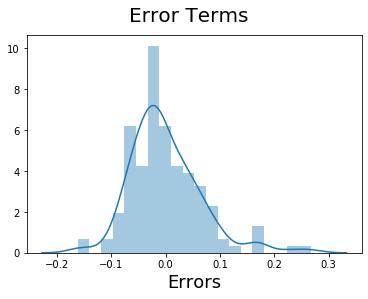

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()                                          # define fig
sns.distplot((y_train - y_train_price), bins = 20)          # Plot displot
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

* Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

## Prediction and Evaluation

In [72]:
# verifying the numerical_var which I have defined in above
print(numerical_vars)

['price', 'wheelbase', 'carlength', 'carwidth', 'boreratio', 'Mileage', 'enginesize', 'horsepower']


In [73]:
# see the data of test
df_test.head()

,price,wheelbase,carlength,carwidth,enginesize,boreratio,horsepower,Mileage,gas,turbo,...,nissan,peugeot,plymouth,porcshce,renault,saab,subaru,toyota,volkswagen,volvo
160,7738.0,95.7,166.3,64.4,98,3.19,70,41.6,1,0,...,0,0,0,0,0,0,0,1,0,0
186,8495.0,97.3,171.7,65.5,109,3.19,85,29.8,1,0,...,0,0,0,0,0,0,0,0,1,0
59,8845.0,98.8,177.8,66.5,122,3.39,84,28.4,1,0,...,0,0,0,0,0,0,0,0,0,0
165,9298.0,94.5,168.7,64.0,98,3.24,112,27.2,1,0,...,0,0,0,0,0,0,0,1,0,0
140,7603.0,93.3,157.3,63.8,108,3.62,73,28.0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [74]:
#### Applying the scaling on the test sets - using here scaler.transform() not fit_transform().

df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])

###### The reason you want to fit the scaler using only the training data is because you don't want to bias your model with information from the test data.

In [75]:
# lets devide the test data to "y_test" and "X_test"
y_test = df_test.pop('price')
X_test = df_test

In [76]:
# Add the constant to test data set
X_test_sm = sm.add_constant(X_test)

# lets check the "X_test_sm" after applying the add_constant function
X_test_sm.head()

,const,wheelbase,carlength,carwidth,enginesize,boreratio,horsepower,Mileage,gas,turbo,...,nissan,peugeot,plymouth,porcshce,renault,saab,subaru,toyota,volkswagen,volvo
160,1.0,0.313793,0.409756,0.341667,0.139623,0.404762,0.091667,0.741758,1,0,...,0,0,0,0,0,0,0,1,0,0
186,1.0,0.368966,0.497561,0.433333,0.181132,0.404762,0.154167,0.417582,1,0,...,0,0,0,0,0,0,0,0,1,0
59,1.0,0.420690,0.596748,0.516667,0.230189,0.563492,0.150000,0.379121,1,0,...,0,0,0,0,0,0,0,0,0,0
165,1.0,0.272414,0.448780,0.308333,0.139623,0.444444,0.266667,0.346154,1,0,...,0,0,0,0,0,0,0,1,0,0
140,1.0,0.231034,0.263415,0.291667,0.177358,0.746032,0.104167,0.368132,1,0,...,0,0,0,0,0,0,1,0,0,0


In [77]:
# X_train_new data and view 
X_train_new.head()

,const,carwidth,horsepower,dohcv,bmw,buick,jaguar,porcshce
122,1.0,0.291667,0.083333,0,0,0,0,0
125,1.0,0.666667,0.395833,0,0,0,0,1
166,1.0,0.308333,0.266667,0,0,0,0,0
1,1.0,0.316667,0.262500,0,0,0,0,0
199,1.0,0.575000,0.475000,0,0,0,0,0


In [78]:
# Now let's use the model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe
X_test_new = X_test[X_train_new.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [79]:
# predict the price now
y_test_pred = lm.predict(X_test_new)

# Model Evaluation:
* from sklearn.metrics import r2_score - Imported this lib in first cell to calculate the r2_score of this model.
* where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.

In [80]:
# Evaluate the model of test data
r2_score(y_true = y_test,y_pred= y_test_pred)

0.8967863841082717

In [81]:
# Checking the value the model of train data
r2_score(y_true = y_train,y_pred= y_train_price)

0.9081069264339418

### Evaluation of test via comparison of y_test_pred and y_test

In [82]:
r2_score(y_test, y_test_pred)

0.8967863841082717

Text(0, 0.5, ' y_test_pred')

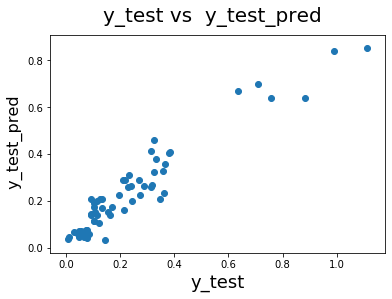

In [83]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_test_pred)                           # Scallter plot to visualize the prediction
fig.suptitle('y_test vs  y_test_pred', fontsize=20)        # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel(' y_test_pred', fontsize=16)                    # y-label

In [84]:
# final model stats. summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     190.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           9.95e-67
Time:                        13:25:40   Log-Likelihood:                 187.63
No. Observations:                 143   AIC:                            -359.3
Df Residuals:                     135   BIC:                            -335.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1216      0.017     -7.009      0.0

# Final Conclusion of Model:
1. R-sqaured and Adjusted R-squared (extent of fit)- 90% variance explained.
* F-stats and Prob(F-stats) (overall model fit) - 190.6 and 9.95e-67- Model fit is significant and explained 90% variance.
* p-values - p-values for all the coefficients is zero and its less than 0.05 - meaning that all the predictors variables are statistically significant.

# Thank you
    - Rohit Keshari